In [1]:
import sys, os
sys.path.insert(1, '../utils')

In [2]:
from resultsCollector import *
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [3]:
settings =  [
    ['cosine', 0.1, 1, False, '(-10, 10)', 250],
    ['exponential', 0.1, 1, False, '(-10, 10)',250],
    ['l1norm', 0.1, 1, False, '(-10, 10)',250],
    ['linear', 0.1, 1, False, '(-10, 10)',250],
    ['piecewise', 0.1, 1, False, '(-10, 10)',250],
    ['quadratic', 0.1, 1, False, '(-10, 10)',250],
]

In [17]:
data_dir = 2
file_list = []
for func in ['linear', 'quadratic', 'cosine', 'exponential', 'l1norm', 'piecewise']:
    file_list.append('out_n_4/data_%d/%s_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json' % (data_dir, func))

In [12]:
collect_data_json(file_list, baseline = False, gpt3 = False)

----------------------------1------------------------------
file path:  out_n_4/data_1/linear_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json
GPTJ RAE: 0.0718
----------------------------2------------------------------
file path:  out_n_4/data_2/linear_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json
GPTJ RAE: 0.0657
----------------------------3------------------------------
file path:  out_n_4/data_3/linear_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json
GPTJ RAE: 0.0737
----------------------------4------------------------------
file path:  out_n_4/data_1/quadratic_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json
GPTJ RAE: 0.1306
----------------------------5------------------------------
file path:  out_n_4/data_2/quadratic_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json
GPTJ RAE: 0.1266
----------------------------6------------------------------
file path:  out_n_4/data_3/quadratic_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json
GPTJ RAE: 0.1026
----------------------------7--

In [4]:
for data_dir in range(1,4):
    file_list = []
    for func in ['linear', 'quadratic', 'cosine', 'exponential', 'l1norm', 'piecewise']:
        file_list.append('out_n_4/data_%d/%s_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json' % (data_dir, func))

    save_csv(file_list, 'out_n_4/data_%d/all_models_acc2.csv' % data_dir)

----------------------------1------------------------------
file path:  out_n_4/data_1/linear_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json
----------------------------2------------------------------
file path:  out_n_4/data_1/quadratic_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json
----------------------------3------------------------------
file path:  out_n_4/data_1/cosine_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json
----------------------------4------------------------------
file path:  out_n_4/data_1/exponential_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json
----------------------------5------------------------------
file path:  out_n_4/data_1/l1norm_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json
----------------------------6------------------------------
file path:  out_n_4/data_1/piecewise_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json
----------------------------1------------------------------
file path:  out_n_4/data_2/linear_n_250_p_1_int_0_(-10.0,10.0)_noise_0.

In [25]:
get_mean_std_syn('out_n_4', num_sims = 3)

In [4]:
mean_df = pd.read_csv(os.path.join('out_n_4','syn_mean_across_3sims.csv'))
std_df = pd.read_csv(os.path.join('out_n_4', 'syn_std_across_3sims.csv'))

In [5]:
dfs = []
for i in range(1,4):
    dfs.append(pd.read_csv(os.path.join('out_n_4', 'data_%d'%i,'%s%d.csv' % ('syn_all_models_acc', i))).sort_values(by = setting_cols).reset_index(drop = True))
    row_idxs = []
    for idx, row in dfs[i-1].iterrows():
        if row[['function', 'noise_level', 'p', 'integer', '(lb,ub)', 'n']].tolist() in settings:
            row_idxs.append(idx)
    dfs[i-1] = dfs[i-1].loc[row_idxs].reset_index(drop = True)


df = pd.concat(dfs, axis = 0)

In [6]:
dfs = []
for i in range(1,4):
    filename = os.path.join('../accuracy', 'data_%d'%i, 'syn_all_models_acc')
    dfs.append(pd.read_csv('%s%d.csv' % (filename, i)).sort_values(by = setting_cols).reset_index(drop = True))
    row_idxs = []
    for idx, row in dfs[i-1].iterrows():
        if row[['function', 'noise_level', 'p', 'integer', '(lb,ub)', 'n']].tolist() in settings:
            row_idxs.append(idx)
    dfs[i-1] = dfs[i-1].loc[row_idxs].reset_index(drop = True)

df_woo = pd.concat(dfs, axis = 0)

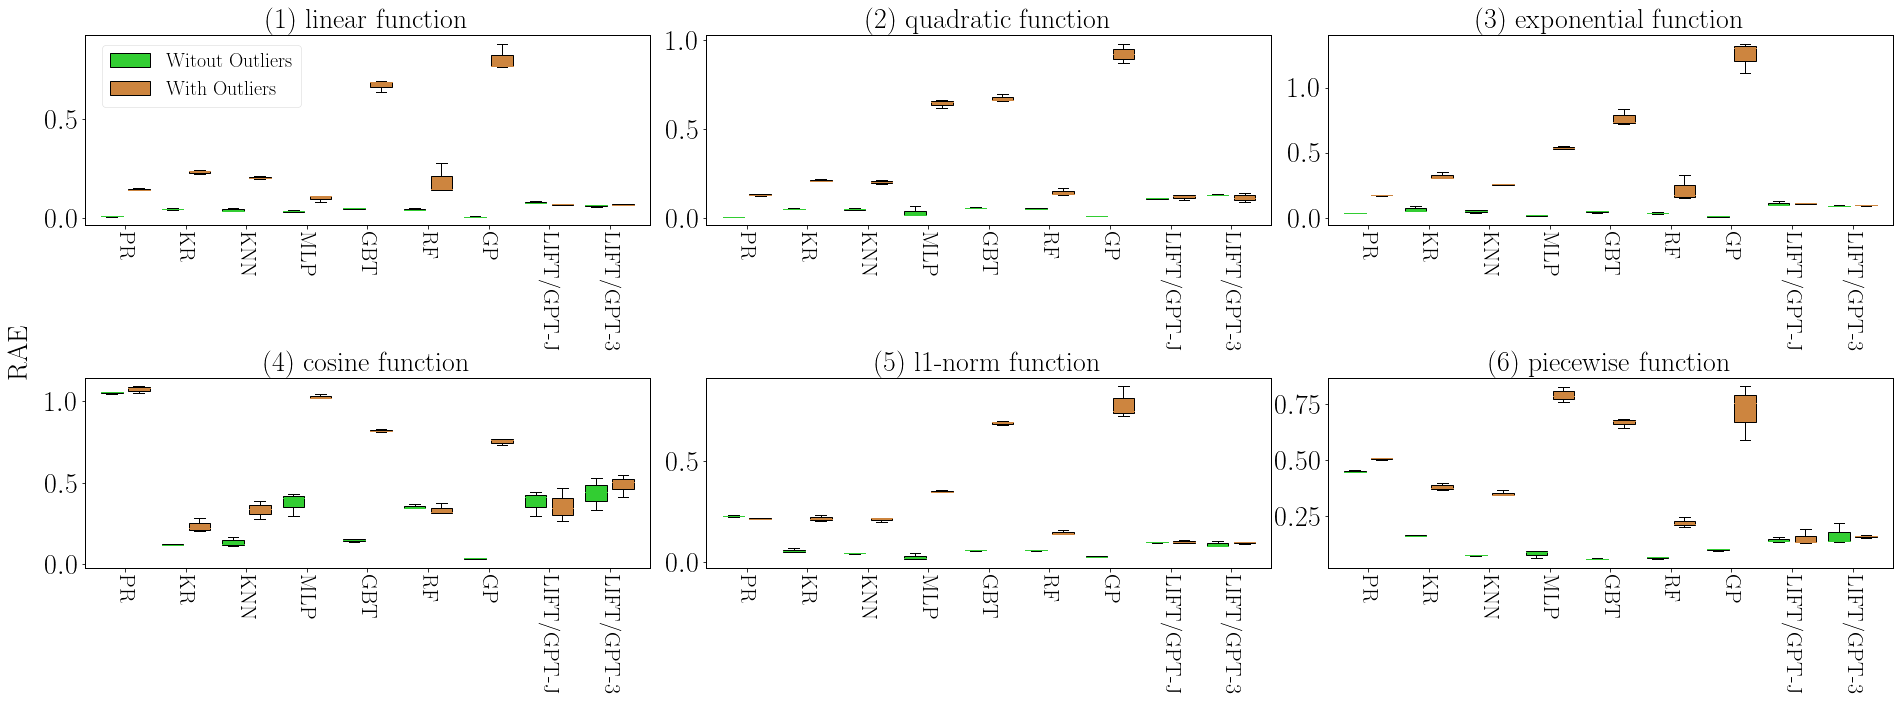

In [7]:
width = 27
height = 10

title_list = ['(1) linear function', '(2) quadratic function', '(3) exponential function',
            '(4) cosine function', '(5) l1-norm function', '(6) piecewise function']
func_list = ['linear', 'quadratic', 'exponential', 'cosine', 'l1norm', 'piecewise']
plt.rc('font', family='serif', serif='times new roman')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=28)
plt.rc('axes', linewidth=1)
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend

# def setColor(box):
#     plt.setp(box['boxes'][0], facecolor = 'limegreen')
#     plt.setp(box['boxes'][1], facecolor = 'yellow')
#     plt.setp(box['boxes'][2], facecolor = 'royalblue')
#     plt.setp(box['boxes'][3], facecolor = 'darkviolet')
#     plt.setp(box['boxes'][4], facecolor = 'peru')
#     plt.setp(box['boxes'][5], facecolor = 'lightcoral')
    
#     plt.setp(box['boxes'][6], facecolor = 'limegreen')
#     plt.setp(box['boxes'][7], facecolor = 'yellow')
#     plt.setp(box['boxes'][8], facecolor = 'royalblue')
#     plt.setp(box['boxes'][9], facecolor = 'darkviolet')
#     plt.setp(box['boxes'][10], facecolor = 'peru')
#     plt.setp(box['boxes'][11], facecolor = 'lightcoral')
    
def setColor(box):
    for i in range(9):
        plt.setp(box['boxes'][i], facecolor = 'limegreen')
        plt.setp(box['medians'][i], color = 'limegreen')
        plt.setp(box['boxes'][i+9], facecolor = 'peru')
        plt.setp(box['medians'][i+9], color = 'peru')

fig, ax = plt.subplots(nrows=2, ncols=3, sharex=False, sharey=False) #plot two subgraphs in one figure, 1 by 2 size, sharing y-axis
fig.subplots_adjust(left=0.06, bottom=.2, right=0.99, top=0.94, wspace=0.1, hspace = 0.8) #margin of the figure
fig.set_size_inches(width, height) #exact size of the figure

for i in range(6):
    func = func_list[i]
    r2 = df[df.function == func]
    r2woo = df_woo[df_woo.function == func]
    row = i // 3
    col = i % 3

    position = np.concatenate([np.linspace(0,9,9), np.linspace(0,9,9)+0.5])
    linear = pd.concat([r2woo[['poly_loss', 'krr_loss', 'knn_loss', 'nn_loss', 'xg_loss', 'rf_loss', 'gp_loss', 'gptj_loss', 'gpt3_loss']],
                       r2[['poly_loss', 'krr_loss', 'knn_loss', 'nn_loss', 'xg_loss', 'rf_loss', 'gp_loss', 'gptj_loss', 'gpt3_loss']]], axis = 1).values
    b = ax[row][col].boxplot(linear, positions = position, widths = 0.4, patch_artist=True)

    setColor(b)

    ax[row][col].set_xticks(np.linspace(0,9,9)+0.25)
    ax[row][col].set_xticklabels(['PR', 'KR', 'KNN', 'MLP', 'GBT', 'RF', 'GP', 'LIFT/GPT-J','LIFT/GPT-3'],rotation=-90)
    ax[row][col].set_title(title_list[i], fontsize = 28)

ax[0][0].legend([b['boxes'][0], b['boxes'][9]], ['Witout Outliers', 'With Outliers'], fontsize = 20, bbox_to_anchor=(0.4,1))
fig.supylabel("RAE", fontsize = 28)
plt.savefig('../figures/regression_robust_boxplot.pdf')
None

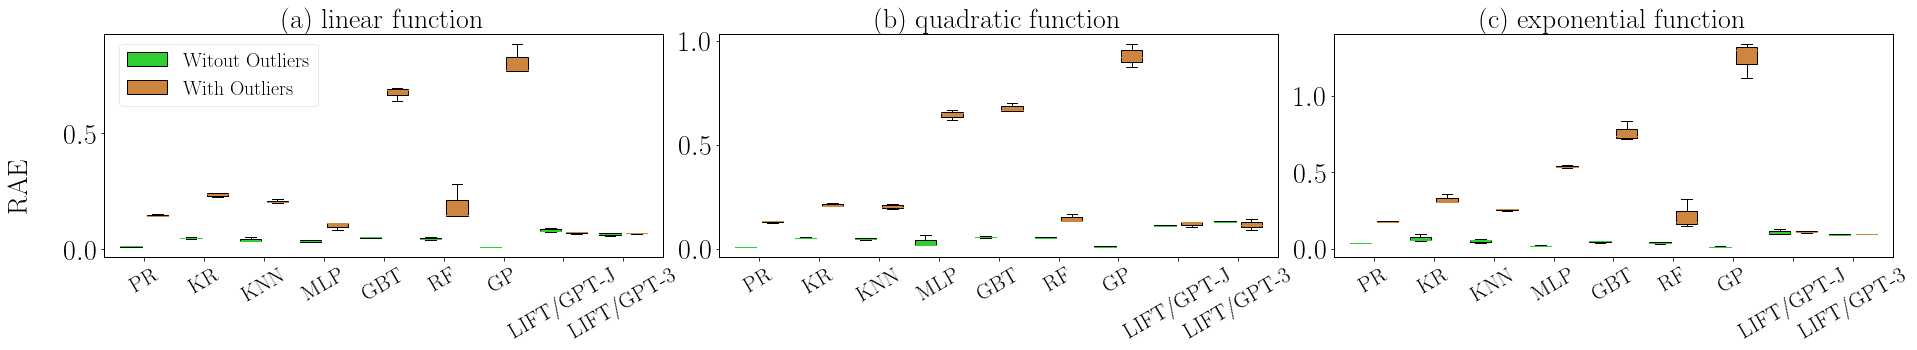

In [32]:
width = 27
height = 5

title_list = ['(1) linear function', '(b) quadratic function', '(c) exponential function',
            ] # '(d) cosine function', '(e) l1-norm function', '(f) piecewise function'
func_list = ['linear', 'quadratic', 'exponential', 'cosine', 'l1norm', 'piecewise']
plt.rc('font', family='serif', serif='times new roman')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=28)
plt.rc('axes', linewidth=1)
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend

# def setColor(box):
#     plt.setp(box['boxes'][0], facecolor = 'limegreen')
#     plt.setp(box['boxes'][1], facecolor = 'yellow')
#     plt.setp(box['boxes'][2], facecolor = 'royalblue')
#     plt.setp(box['boxes'][3], facecolor = 'darkviolet')
#     plt.setp(box['boxes'][4], facecolor = 'peru')
#     plt.setp(box['boxes'][5], facecolor = 'lightcoral')
    
#     plt.setp(box['boxes'][6], facecolor = 'limegreen')
#     plt.setp(box['boxes'][7], facecolor = 'yellow')
#     plt.setp(box['boxes'][8], facecolor = 'royalblue')
#     plt.setp(box['boxes'][9], facecolor = 'darkviolet')
#     plt.setp(box['boxes'][10], facecolor = 'peru')
#     plt.setp(box['boxes'][11], facecolor = 'lightcoral')
    
def setColor(box):
    for i in range(9):
        plt.setp(box['boxes'][i], facecolor = 'limegreen')
        plt.setp(box['medians'][i], color = 'limegreen')
        plt.setp(box['boxes'][i+9], facecolor = 'peru')
        plt.setp(box['medians'][i+9], color = 'peru')

fig, ax = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False) #plot two subgraphs in one figure, 1 by 2 size, sharing y-axis
fig.subplots_adjust(left=0.07, bottom=.3, right=0.99, top=0.92, wspace=0.1, hspace = 0.8) #margin of the figure
fig.set_size_inches(width, height) #exact size of the figure

for i in range(3):
    func = func_list[i]
    r2 = df[df.function == func]
    r2woo = df_woo[df_woo.function == func]
    row = i // 3
    col = i % 3

    position = np.concatenate([np.linspace(0,9,9), np.linspace(0,9,9)+0.5])
    linear = pd.concat([r2woo[['poly_loss', 'krr_loss', 'knn_loss', 'nn_loss', 'xg_loss', 'rf_loss', 'gp_loss', 'gptj_loss', 'gpt3_loss']],
                       r2[['poly_loss', 'krr_loss', 'knn_loss', 'nn_loss', 'xg_loss', 'rf_loss', 'gp_loss', 'gptj_loss', 'gpt3_loss']]], axis = 1).values
    b = ax[col].boxplot(linear, positions = position, widths = 0.4, patch_artist=True)

    setColor(b)

    ax[col].set_xticks(np.linspace(0,9,9)+0.25)
    ax[col].set_xticklabels(['PR', 'KR', 'KNN', 'MLP', 'GBT', 'RF', 'GP', 'LIFT/GPT-J','LIFT/GPT-3'],rotation=30)
    ax[col].set_title(title_list[i], fontsize = 28)

ax[0].legend([b['boxes'][0], b['boxes'][9]], ['Witout Outliers', 'With Outliers'], fontsize = 20, bbox_to_anchor=(0.4,1))
fig.supylabel("RAE", fontsize = 28)
plt.savefig('../figures/regression_robust_boxplot_demo.pdf')
None